In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor as RFRegressor

In [ ]:
df = pd.read_csv('/content/T1.csv')
df.columns = ['date', 'active_power', 'wind_speed', 'theor_power', 'wind_dir']

df

,date,active_power,wind_speed,theor_power,wind_dir
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [ ]:
df.describe()

,active_power,wind_speed,theor_power,wind_dir
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [ ]:
# Convert to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set date column as index
df.set_index('date', inplace=True)

df

,active_power,wind_speed,theor_power,wind_dir
date,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...
2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724
2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599
2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500


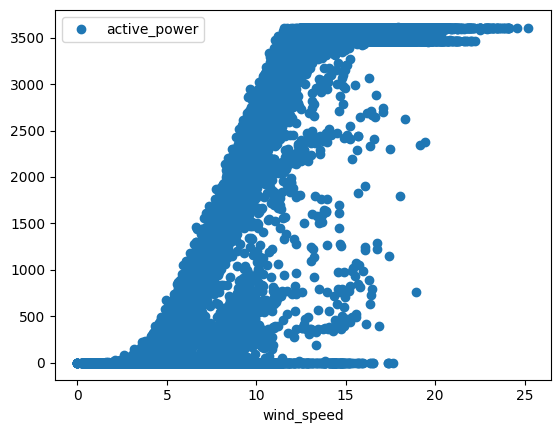

In [ ]:
ax = df.plot(x='wind_speed', y='active_power', style='o')

In [ ]:

df2 = df.copy()

# Remove negative active power
df_outlier_removed = df2[df2.active_power>0]

df_outlier_removed

,active_power,wind_speed,theor_power,wind_dir
date,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...
2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724
2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599
2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500


In [ ]:
# When wind speed is below 3.5, there is still power
df_outlier_removed[(df_outlier_removed.wind_speed<=3.5) & (df_outlier_removed.active_power!=0)]

,active_power,wind_speed,theor_power,wind_dir
date,,,,
2018-01-01 12:30:00,41.947239,3.253968,29.286956,233.065903
2018-03-01 15:30:00,7.347679,3.011371,16.374212,238.690598
2018-03-01 15:50:00,12.344200,3.246252,28.731272,238.076508
2018-05-01 07:30:00,13.934310,3.227394,27.413258,62.523109
2018-05-01 08:10:00,22.780531,3.310203,33.624574,74.864113
...,...,...,...,...
2018-12-18 01:40:00,6.939387,3.133558,21.700877,49.132389
2018-12-21 05:40:00,20.305180,2.648756,0.000000,175.433197
2018-12-21 05:50:00,4.730608,2.157747,0.000000,172.074402


<Axes: xlabel='date'>

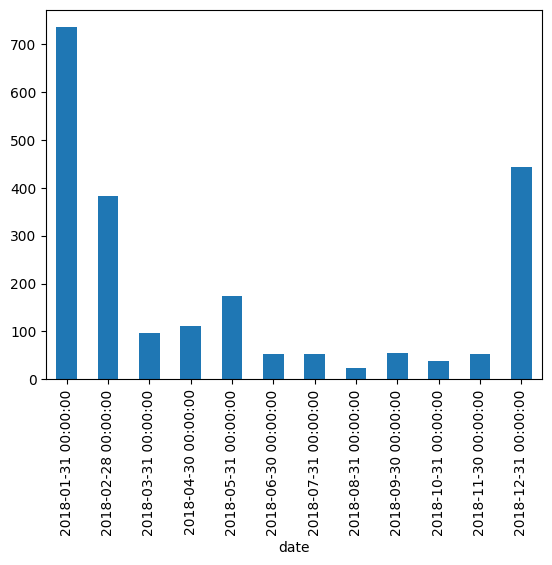

In [ ]:
df_zero_power = df[(df.active_power==0) & (df.theor_power!=0) & (df.wind_speed>3.5)]
df_zero_power.resample('M').count().active_power.plot(kind='bar')

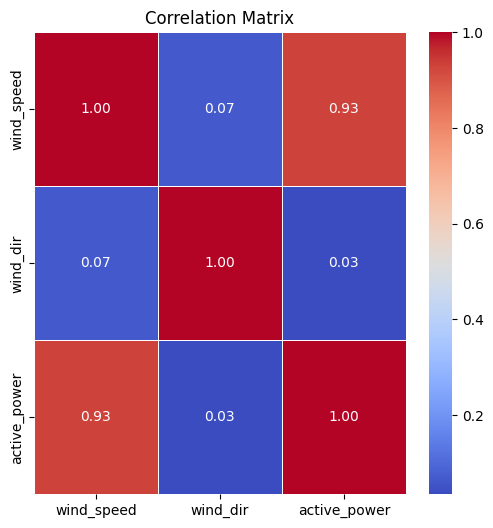

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X = df_outlier_removed[['wind_speed', 'wind_dir']]
y = df_outlier_removed['active_power']

df_corr = pd.concat([X, y], axis=1)

correlation_matrix = df_corr.corr()

plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


		Error Table
Mean Absolute Error      :  153.48596257068655
Mean Squared Error        :  109146.72204651237
Root Mean Squared Error   :  330.37360979126703
Accuracy on Training set  :  0.9910465969355416
Accuracy on Testing set   :  0.930994116882739


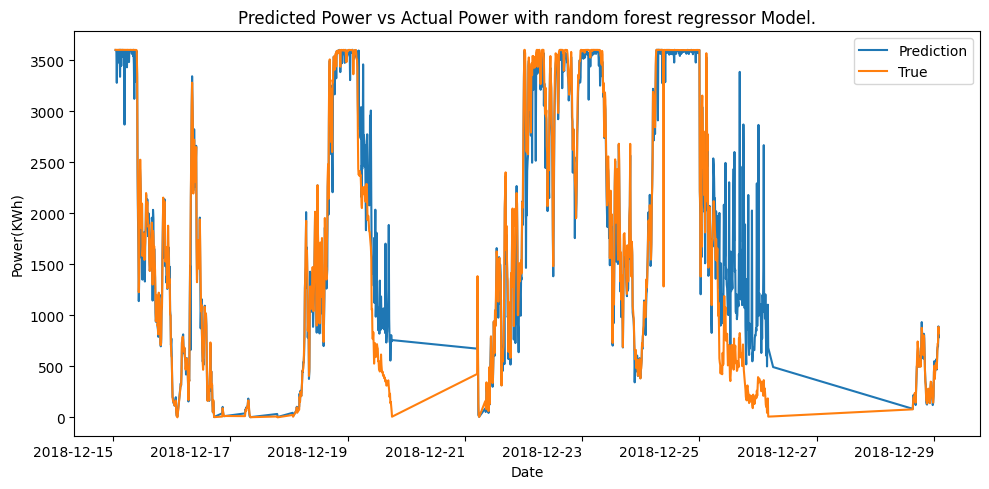

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

def Models(model, df):
    X = df_outlier_removed[['wind_speed']].values
    y = df_outlier_removed['active_power'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_total = model.predict(X)

    print("\t\tError Table")
    print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error        : ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error   : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Accuracy on Training set  : ', model.score(X_train, y_train))
    print('Accuracy on Testing set   : ', model.score(X_test, y_test))

    return y_total, y

model = RandomForestRegressor()
y_total, y_actual = Models(model, df_outlier_removed)


x_plot_rf = df_outlier_removed.index
pred_df = pd.DataFrame({'Date':x_plot_rf, 'Prediction': y_total, 'True': y_actual})
pred_df.set_index('Date', inplace=True)
pred_df2 = pred_df['2018-12-15 01:00:00	':'2018-12-29 02:00:00 ']
pred_df2.plot(rot='horizontal',figsize=(10,5))
plt.title('Predicted Power vs Actual Power with random forest regressor Model.')
plt.ylabel('Power(KWh)')
plt.tight_layout()
plt.show()

		Error Table
Mean Absolute Error:  127.49719218719781
Mean Squared Error:  81114.19963919073
R-squared:  0.9487171316325297


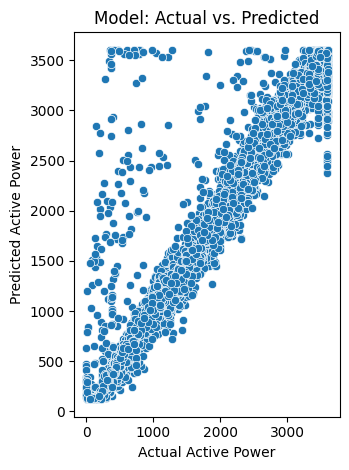

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def Models(model, df):
    X = df_outlier_removed[['wind_speed']].values
    y = df_outlier_removed['active_power'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    y_total = model.predict(X)

    print("\t\tError Table")
    print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
    print('R-squared: ', r2_score(y_test, y_pred))

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=y_test, y=y_pred)
    plt.title('Model: Actual vs. Predicted')
    plt.xlabel('Actual Active Power')
    plt.ylabel('Predicted Active Power')

    plt.tight_layout()
    plt.show()

    return y_total, y

svr_model = SVR(kernel='rbf')
y_total_svr, y_actual_svr = Models(svr_model, df_outlier_removed)


		Error Table
Mean Absolute Error:  335.8954010956189
Mean Squared Error:  231004.38753274514
R-squared:  0.8539519880508548


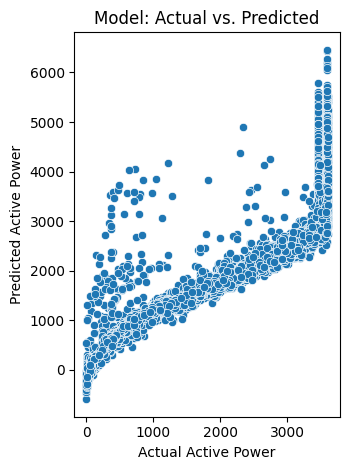

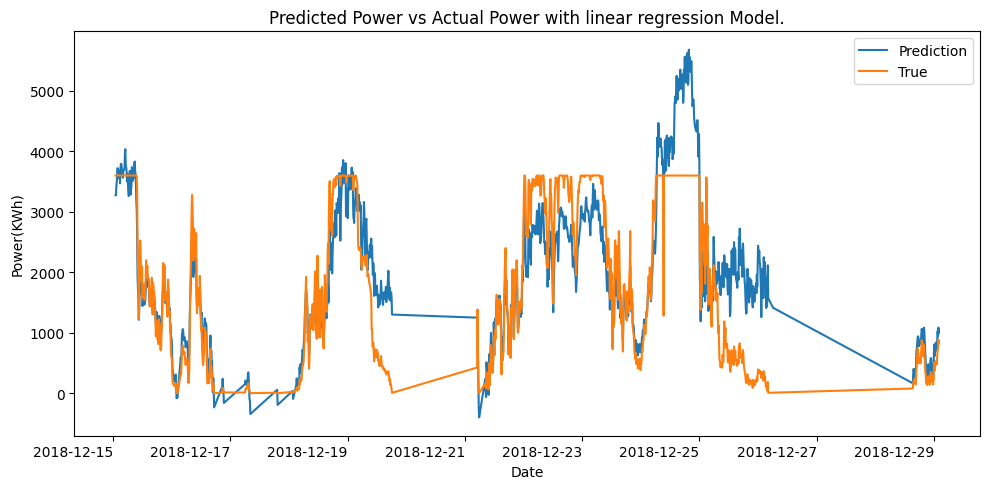

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

def Models(model, df):
    X = df_outlier_removed[['wind_speed']].values
    y = df_outlier_removed['active_power'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_total = model.predict(X)

    print("\t\tError Table")
    print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
    print('R-squared: ', r2_score(y_test, y_pred))

    # Visualize
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=y_test, y=y_pred)
    plt.title('Model: Actual vs. Predicted')
    plt.xlabel('Actual Active Power')
    plt.ylabel('Predicted Active Power')

    plt.tight_layout()
    plt.show()

    return y_total, y

linear_model = LinearRegression()
y_total_linear, y_actual_linear = Models(linear_model, df_outlier_removed)

x_plot_linear = df_outlier_removed.index
pred_df = pd.DataFrame({'Date':x_plot_linear, 'Prediction': y_total_linear, 'True': y_actual_linear})
pred_df.set_index('Date', inplace=True)
pred_df2 = pred_df['2018-12-15 01:00:00	':'2018-12-29 02:00:00 ']
pred_df2.plot(rot='horizontal',figsize=(10,5))
plt.title('Predicted Power vs Actual Power with linear regression Model.')
plt.ylabel('Power(KWh)')
plt.tight_layout()
plt.show()